<a href="https://colab.research.google.com/github/theophilus96/AI-and-Data-Mining/blob/main/Titanic_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid', rc= {'figure.facecolor': 'gray',}, font_scale=1.5)


In [ ]:
import io
from google.colab import files
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
file = files.upload()
def Readcsv(data):
    return (pd.read_csv(data,index_col = 'PassengerId'))
test_data = Readcsv("test.csv")
train_data = Readcsv("train.csv")


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_data.head()#Viewing the first 5 lines

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
train_data.columns, test_data.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

### Explanatory Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


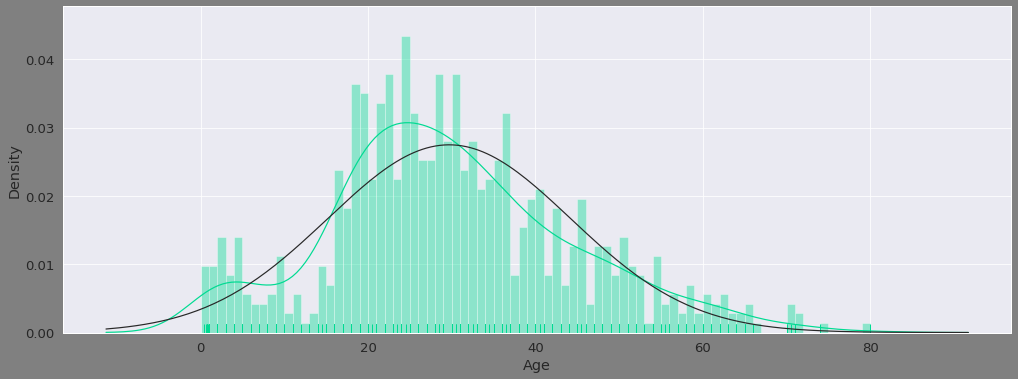

In [ ]:
plt.figure(figsize = [17,6])
a = sns.distplot(train_data['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

Most of the Passengers aboard the Titanic were in the range of 16~ to 40. The age distribution shows bi-modal curve.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

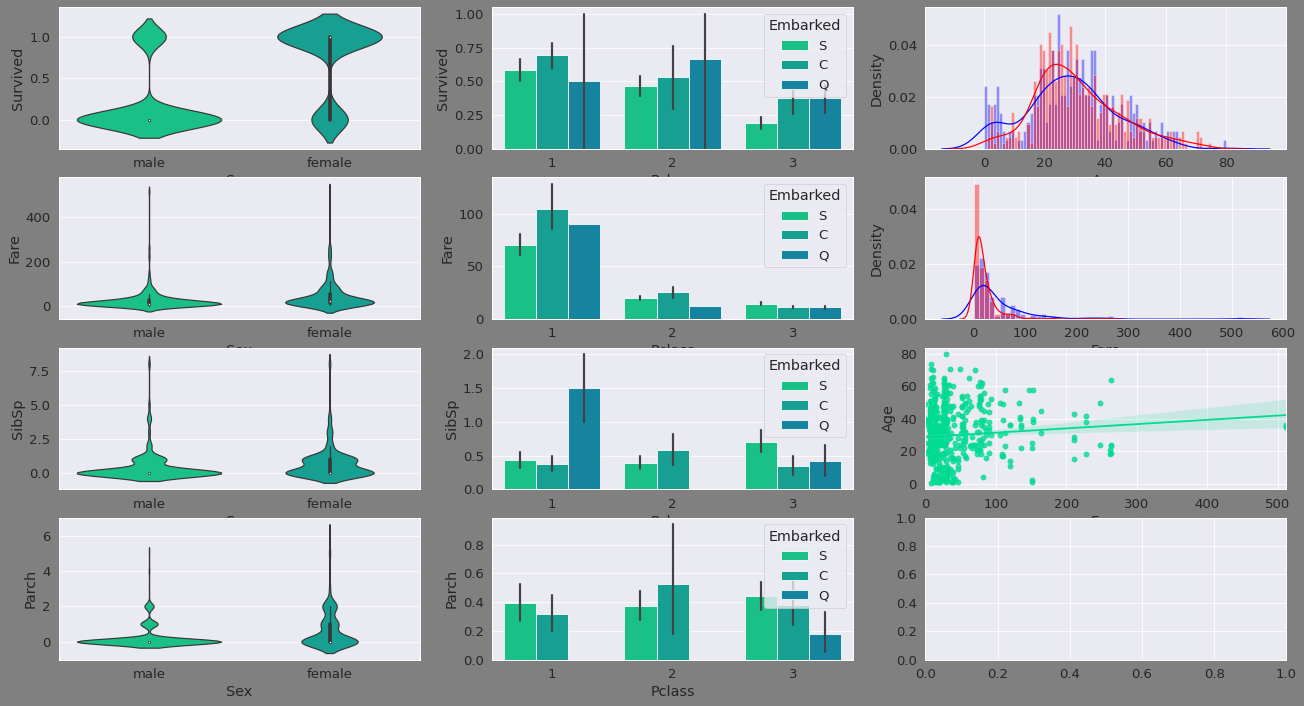

In [ ]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
#sns.set_palette('Set1', 8, .75)
#sns.set_style('whitegrid')
#plt.subplot(331)
sns.violinplot(x = 'Sex', y = 'Survived', data = train_data,ax = ax[0,0])
#sns.despine(offset=10, trim=True)
#plt.subplot(332)
sns.barplot(x = 'Pclass',y ='Survived',data = train_data,hue = 'Embarked',ax = ax[0,1])
#plt.subplot(333)
sns.distplot(train_data[train_data['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(train_data[train_data['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
#plt.subplot(334)
sns.violinplot(x = 'Sex', y = 'Fare', data = train_data,ax = ax[1,0])
#plt.subplot(335)
sns.barplot(x ='Pclass', y = 'Fare',data = train_data , hue = 'Embarked', ax = ax[1,1])
#plt.subplot(336)
sns.distplot(train_data[train_data['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(train_data[train_data['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])

#plt.subplot(337)
sns.violinplot(x = 'Sex', y ='SibSp',data = train_data,ax = ax[2,0])
#plt.subplot(338)
sns.barplot(x= 'Pclass', y = 'SibSp', data = train_data, hue = 'Embarked', ax = ax[2,1])
#plt.subplot(339)
sns.regplot(x = 'Fare', y = 'Age', data = train_data, ax = ax[2,2])
#plt.subplot(341)
sns.violinplot(x = 'Sex', y = 'Parch', data = train_data, ax = ax[3,0])
#plt.subplot(342)
sns.barplot(x = 'Pclass', y = 'Parch', data = train_data, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)



```
1. Starting from the first graph, we can see that very few males survived as compared to female and very few females died in comparision to males.

2. First and second class had the most survival rate than the third class whereas pessangers who boarded from 'S' had the least survival rate.

3. The blue and red distribution shows whether the pessanger survived or not.

4. & 5. There were many passengers from both category who paid nothing to board the ship particularly from the third class

6. The distribution of Fare with respect to Survival blue indicating Survived while red indicating dead.

7. & 8. There were more female SibSp(siblings and spouces) as compared to male and majority of them were from First class from Q station followed by third class.

9. Distribution of Fare by Age shows that there were many passengers paying nothing being majority while a few paying more than 500!

10. & 11. By looking at the graph we can see that it is similar with SibSp to some extent with the only difference that Parch is flattened and the bar plot says that Parch there were no Passengers from Q aboard as 1st and 2nd class.
```



In [ ]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 

In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carr, Miss. Helen ""Ellen""",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [ ]:
train_data[train_data['Fare']>500]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


those who paid highest have the same ticket names

In [ ]:
def get_isnull(train,test):
    return(train.isnull().sum(), test.isnull().sum()) 

In [ ]:
get_isnull(train_data,test_data)

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64, Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)

There are alot of missing values present in both the datasets which is not good for the model.



In [ ]:
#function for concatation for future use.
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf

In [ ]:
#Function for separation for future use.
def separate(data):
    data1 = data.iloc[:len(train_data)]
    data2 = data.iloc[len(train_data):]
    return data1, data2

In [ ]:
train_data[train_data['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


median is used instead of mean so that the value does not sway too much in a direction. 



In [ ]:
def filling(data1,data2):
    data = combine(data1,data2)
    #Sometimes csv file has null values, which are later displayed as NaN in Data Frame.
    # Just like pandas dropna() method manage and remove Null values from a data frame,
    # fillna() manages and let the user replace NaN values with some value of their own.
    data['Embarked'] = data['Embarked'].fillna('C')
    data['Age']      = data['Age'].fillna(data['Age'].median())
    data['Fare']     = data['Fare'].fillna(data['Fare'].median())
    data['Cabin']    = data['Cabin'].fillna('Z')
    data['Cabin']    = data['Cabin'].apply(lambda x: str(x)[0])
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = filling(train_data, test_data)

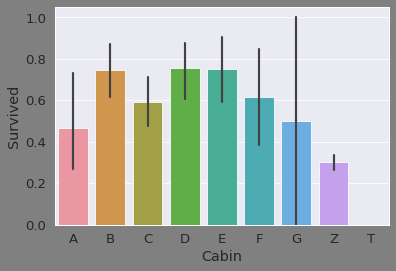

In [ ]:
sns.barplot(x= 'Cabin', y = 'Survived', data = train_data ,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'T'])


In [ ]:
def pew(data1, data2):
    data = combine(data1,data2)
    #Replace a single value with a new value for an individual DataFrame column
    data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
    data['Cabin'] = data['Cabin'].replace(['F', 'C'], 'M')        #Medium
    data['Cabin'] = data['Cabin'].replace(['T', 'G', 'A',], 'L')  #Low
    data['Cabin'] = data['Cabin'].replace(['Z'],'X')              #Missing
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = pew(train_data, test_data)

Combine both SibSp and Parch as they can be represented as family.



In [ ]:
def family(data1, data2):
    data = combine(data1,data2)
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data['Alone']  = data['Family'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(['SibSp','Parch'],axis = 1, inplace = True)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = family(train_data, test_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


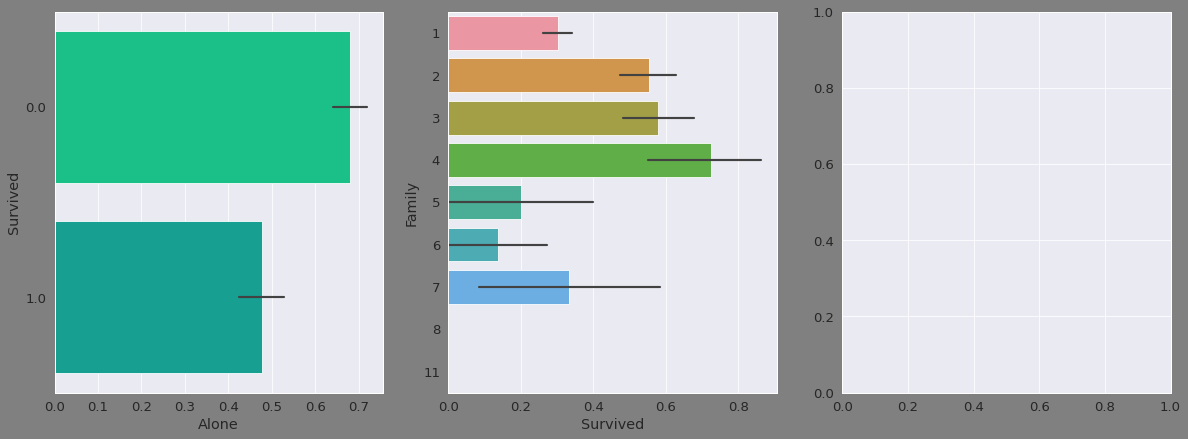

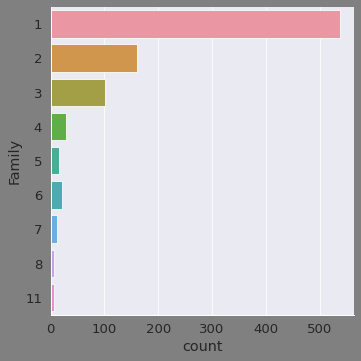

In [ ]:
f,ax = plt.subplots(1,3,figsize=[20,7])
sns.barplot(x = 'Alone', y = 'Survived', data = train_data,orient = 'h', ax = ax[0])
sns.barplot(x = 'Survived', y = 'Family', data = train_data,orient = 'h', ax = ax[1])
sns.catplot(y = 'Family',data = train_data, kind = 'count', orient = 'h', ax = ax[2])
#plt.close(2)
#plt.close(3)

Most of the Passengers aboard were alone. The Passengers who were alone had a lower survival rate which is also true for Passengers who had more than 4 members with them.

In [ ]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,X,S,2,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,M,C,2,0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,X,S,1,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,M,S,2,0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,X,S,1,1


In [ ]:
def FamilyGroup(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Family'] > 2, 'FamilyGroup'] = 3
    data.loc[data['Family'] == 1, 'FamilyGroup'] = 1
    data.loc[data['Family'] == 2, 'FamilyGroup'] = 2
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = FamilyGroup(train_data, test_data)

In [ ]:
def mapping(data1, data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].map({'C':1, 'S':2, 'Q':3})
    data['Sex']      = data['Sex'].map({'male': 1,'female':0})
    data['CabinGroup'] = data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = mapping(train_data, test_data)

In [ ]:
train_data['CabinGroup'].value_counts()

3    687
0    112
1     72
2     20
Name: CabinGroup, dtype: int64

In [ ]:
def Titles(data1, data2):
    data = combine(data1,data2)
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          #High
                                            regex = True).replace(['Mrs','Miss','Master',],1,               #Medium
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              #Low
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, #Least
                                            regex = True)
    #data['TitleGroup'] = data['TitleGroup'].replace({'male':1,'female':0,'Special':2})
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = Titles(train_data, test_data)
##['Mrs','Miss','Mme','Ms','Lady','Mlle','Countess','Dona'],'female'
##['Sir','Don','Rev','Mr',],'male'
##['Col','Dr','Col','Capt','Major','Jonkheer','Master'],'Special'

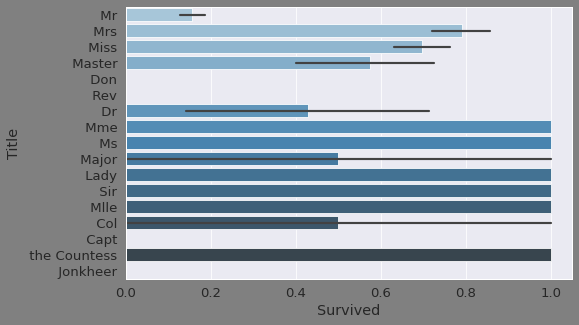

In [ ]:
plt.figure(figsize = [8,5])
sns.barplot(x = 'Survived', y = 'Title', data = train_data, palette = 'Blues_d',)

In [ ]:
def surname(data1, data2):
    data = combine(data1,data2)
    data['Surname'] = data['Name'].apply(lambda x: str(x).split(' ')[0].split(',')[0])
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    train_data, test_data = separate(data)
    return train_data, test_data

train_data, test_data = surname(train_data, test_data)


In [ ]:
train_data.loc[train_data['Ticket'].str.contains('113803')]


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname
PassengerId,,,,,,,,,,,,,,,,,
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1,M,2,2,0,2.0,1,Mrs,1,Futrelle,2
138,0.0,1,"Futrelle, Mr. Jacques Heath",1,37.0,113803,53.1,M,2,2,0,2.0,1,Mr,2,Futrelle,2


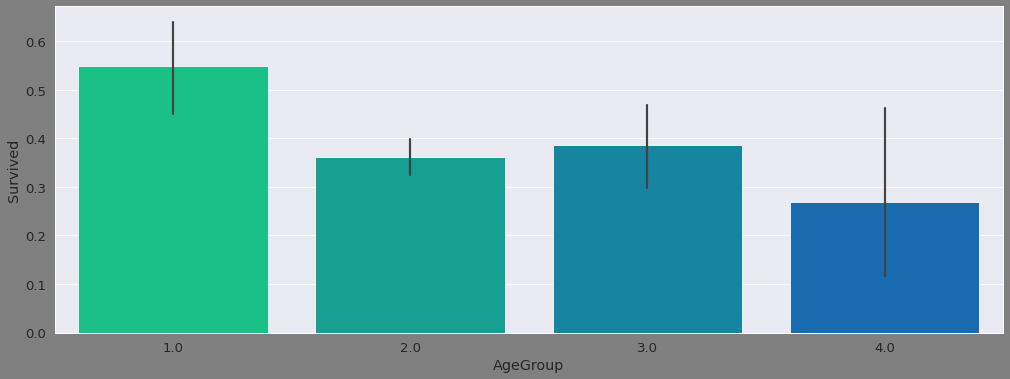

In [ ]:
def age_distribution(data1, data2):
    data = combine(data1,data2)
    #data.loc[data['Age']].round() not sure what is wrong with the round function
    data.loc[data['Age'] <= 16, 'AgeGroup'] = 1
    data.loc[(data['Age'] > 16) & (data['Age'] <= 40), 'AgeGroup'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] < 60), 'AgeGroup'] = 3
    data.loc[(data['Age'] >= 60), 'AgeGroup'] = 4
    #data['AgeGroup'].astype(int)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = age_distribution(train_data, test_data)
plt.figure(figsize = [17,6])
sns.barplot(x = train_data['AgeGroup'], y = train_data['Survived'])
plt.rc('xtick',labelsize = 12)

In [ ]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,X,2,2,0,2.0,3,Mr,2,Braund,2,2.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,M,1,2,0,2.0,1,Mrs,1,Cumings,2,2.0
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,X,2,1,1,1.0,3,Miss,1,Heikkinen,1,2.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2.0,1,Mrs,1,Futrelle,2,2.0
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1.0,3,Mr,2,Allen,2,2.0


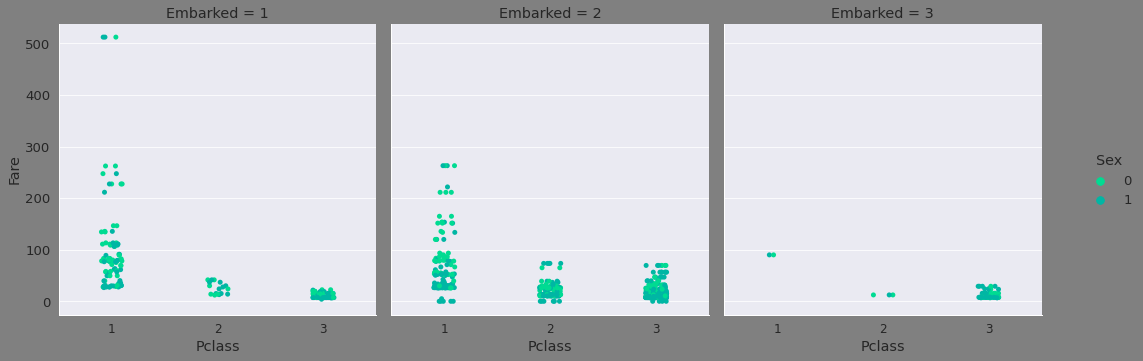

In [ ]:
sns.catplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = train_data, margin_titles = True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


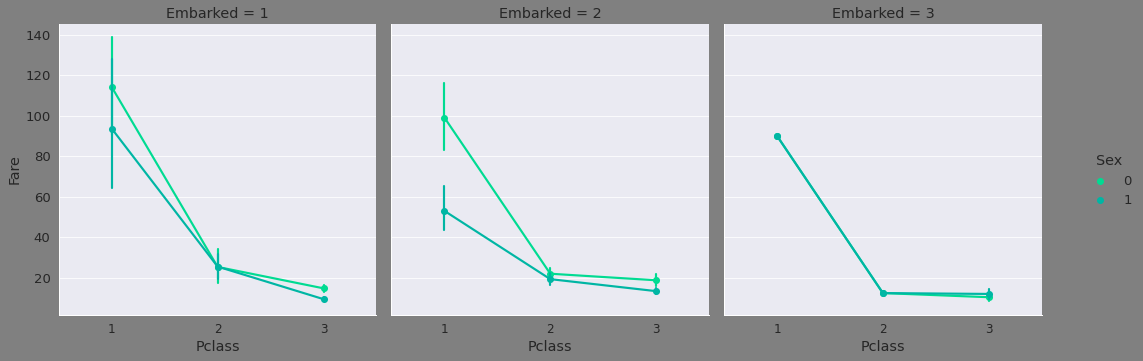

In [ ]:
sns.factorplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = train_data, margin_titles = True)

There is much difference for 1st and 2nd Embarkation for 1st and 3rd Pclass in terms of fare for males and females while the 2nd class fare is similar in all the Embarkations.



In [ ]:
def SharedSurname(data1, data2):
    data = combine(data1,data2)
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = SharedSurname(train_data, test_data)

In [ ]:
test_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",1,34.5,330911,7.8292,X,3,1,1,1.0,3,Mr,2,Kelly,5,2.0
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,X,2,2,0,2.0,3,Mrs,1,Wilkes,1,3.0
894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,X,3,1,1,1.0,3,Mr,2,Myles,1,4.0
895,NaN,3,"Wirz, Mr. Albert",1,27.0,315154,8.6625,X,2,1,1,1.0,3,Mr,2,Wirz,1,2.0
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,3101298,12.2875,X,2,3,0,3.0,3,Mrs,1,Hirvonen,2,2.0


Grouping Fare and creating a new column called 'FareGroup' with their means by Pclass



In [ ]:
def fare_distribution(data1, data2):
    data = combine(data1,data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    #data['Fare'] = data['Fare'].map({'Very Low': 0, 'Low': 1, 'Medium':2, 'High':3})
    data['FareGroup'] = data['FareGroup'].astype(int)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = fare_distribution(train_data, test_data)

In [ ]:
def Tickets(data1, data2):
    data = combine(data1,data2)
    #Creating a new column to display the freq of the tickets present
    data['SharedTicketCount'] = data.groupby('Ticket')[['Fare']].transform('count').astype(int)
    #Removing any characters other than alphabets and numbers to count the ticket length
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = Tickets(train_data, test_data)

In [ ]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Family', 'Alone', 'FamilyGroup', 'CabinGroup', 'Title',
       'TitleGroup', 'Surname', 'SharedSurname', 'AgeGroup', 'FareGroup',
       'SharedTicketCount', 'TicketLength'],
      dtype='object')

In [ ]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A521171,7.2500,X,2,2,0,2.0,3,Mr,2,Braund,2,2.0,1,1,7
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC17599,71.2833,M,1,2,0,2.0,1,Mrs,1,Cumings,2,2.0,3,2,7
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STONO23101282,7.9250,X,2,1,1,1.0,3,Miss,1,Heikkinen,1,2.0,1,1,13
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2.0,1,Mrs,1,Futrelle,2,2.0,3,2,6
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1.0,3,Mr,2,Allen,2,2.0,1,1,6


In [ ]:
X = train_data.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
y = train_data['Survived']
X.shape , y.shape

((891, 11), (891,))

In [ ]:
X.head()

,Pclass,Sex,Embarked,FamilyGroup,CabinGroup,TitleGroup,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,
1,3,1,2,2.0,3,2,2,2.0,1,1,7
2,1,0,1,2.0,1,1,2,2.0,3,2,7
3,3,0,2,1.0,3,1,1,2.0,1,1,13
4,1,0,2,2.0,1,1,2,2.0,3,2,6
5,3,1,2,1.0,3,2,2,2.0,1,1,6


In [ ]:
X.columns

Index(['Pclass', 'Sex', 'Embarked', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

### Correlation

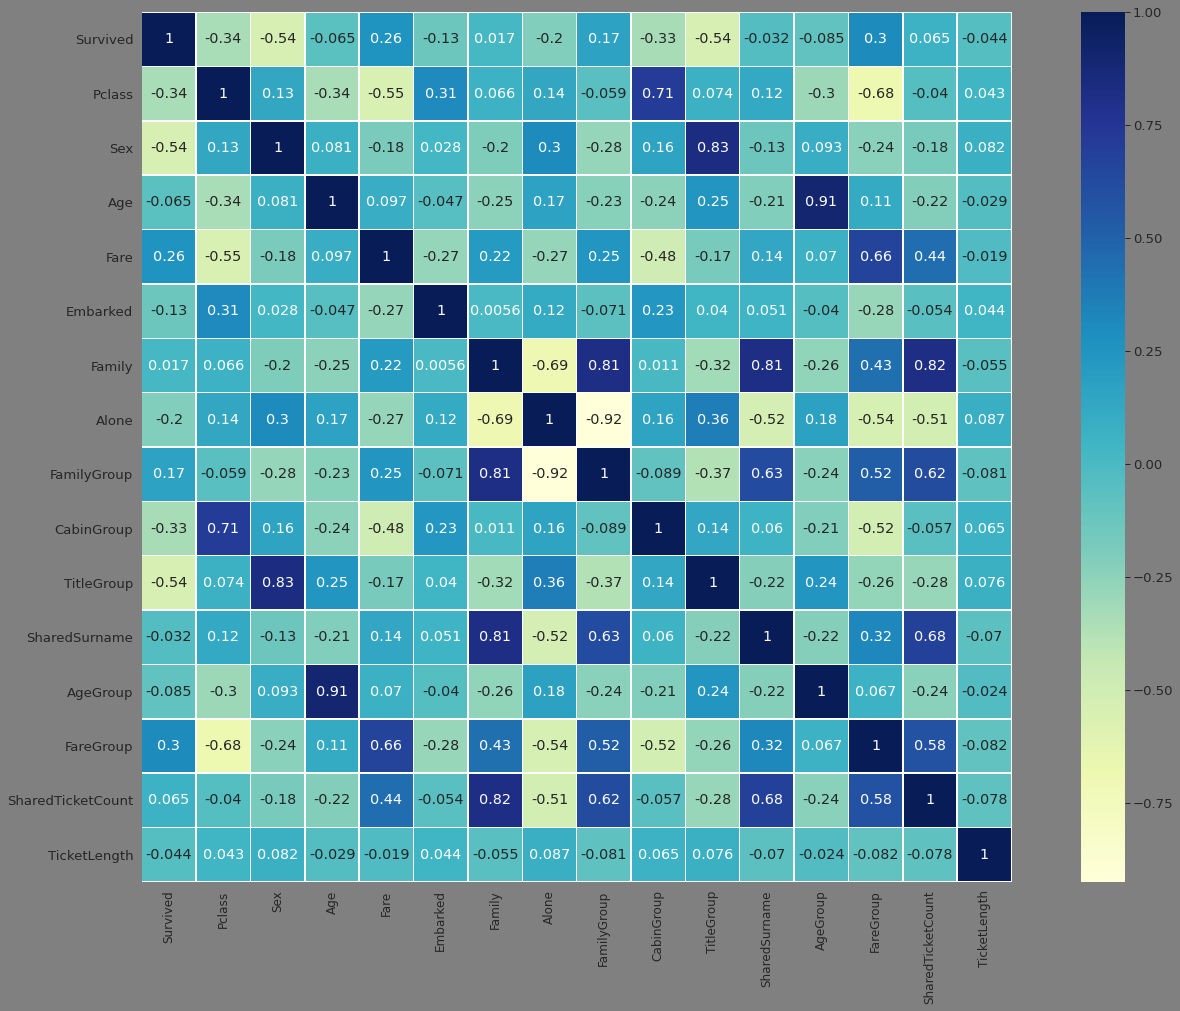

In [ ]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(train_data.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

Since categorical features have been created from the features present in the dataset, we will only be taking the categorical for training the models.

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier, plot_importance 

In [ ]:
npX = np.array(X).copy()
npy = np.array(y).copy()

### Model(SVM)

In [ ]:
clf_svm = SVC()

In [ ]:
Classifiers = ['SVM']
scores = []
models = [clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [ ]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score', ascending = False)

In [ ]:
mode

,score
SVM,0.833895


In [ ]:
parameters_svm = {'C':[0.01,0.9],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

**parameters for SVM**

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

probabilitybool, default=False
Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the User Guide.
random_stateint or RandomState instance, default=None
Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls. See Glossary.
decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification.


In [ ]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

In [ ]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

In [ ]:
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)

0.8338951310861423


### Decision Boundary Visualisation

Let us visualize the decision boundaries to see if our models are overfitting or not but the number of features in our data set are 7+ we'll have to reduce the dimensions to 2 to be able to visualize, in this notebook PCA is used for dimensionality reduction.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=  2).fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Support Vector Machines')

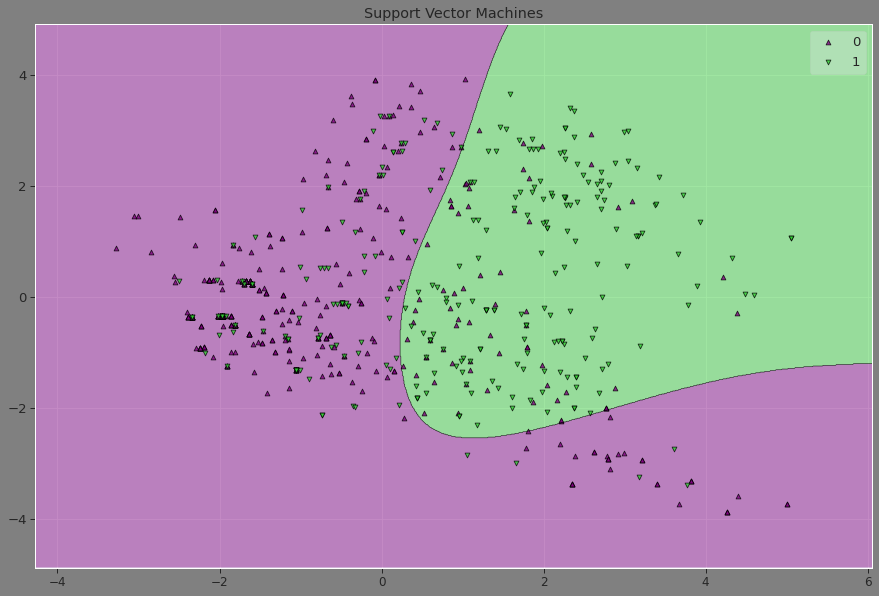

In [ ]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = t.astype(np.integer)
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',markers = ['^','v'])
plt.title('Support Vector Machines')

In [ ]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(npX,npy)
test_data = test_data.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
nptest = np.array(test_data)
pred = clf_svm.predict(nptest)
predictions = pd.DataFrame(pred, index = test_data.index, columns = ['Survived'])
predictions.to_csv('submission.csv')

 Keep in mind, that SVC (libsvm) and LinearSVC (liblinear) make different assumptions in regards to the optimization-problem, which results in different performances on the same task (linear-kernel: LinearSVC much more efficient than SVC in general; but some tasks can't be tackled by LinearSVC).

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

### (a) Understand the training and testing datasets that we provided. Make a table to describe the two datasets, including their feature dimension, number of samples, mean and variance of the values in each attribute. (5% marks)



#### Feature Dimension for both training and test data sets.

As well as the number of samples

In [ ]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    float64
 1   Pclass             891 non-null    int64  
 2   Name               891 non-null    object 
 3   Sex                891 non-null    int64  
 4   Age                891 non-null    float64
 5   Ticket             891 non-null    object 
 6   Fare               891 non-null    float64
 7   Cabin              891 non-null    object 
 8   Embarked           891 non-null    int64  
 9   Family             891 non-null    int64  
 10  Alone              891 non-null    int64  
 11  FamilyGroup        891 non-null    float64
 12  CabinGroup         891 non-null    int64  
 13  Title              891 non-null    object 
 14  TitleGroup         891 non-null    int64  
 15  Surname            891 non-null    object 
 16  SharedSurname      891 non

#### Count, mean and standard deviation for both training and test data sets

In [ ]:
train_data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Alone,FamilyGroup,CabinGroup,TitleGroup,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,32.204208,1.895623,1.904602,0.602694,1.613917,2.438833,1.615039,2.322110,2.085297,1.991021,2.121212,6.151515
std,0.486592,0.836071,0.477990,13.019697,49.693429,0.516354,1.613459,0.489615,0.819144,1.078605,0.559854,1.961585,0.601045,1.046089,1.796660,1.820774
min,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,2.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,6.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,6.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,3.000000,11.000000,1.000000,3.000000,3.000000,4.000000,11.000000,4.000000,4.000000,11.000000,14.000000


In [ ]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


#### Variance for both training and test datasets

In [ ]:
print(train_data.var())

Survived                0.236772
Pclass                  0.699015
Sex                     0.228475
Age                   169.512498
Fare                 2469.436846
Embarked                0.266621
Family                  2.603248
Alone                   0.239723
FamilyGroup             0.670997
CabinGroup              1.163389
TitleGroup              0.313436
SharedSurname           3.847814
AgeGroup                0.361256
FareGroup               1.094301
SharedTicketCount       3.227988
TicketLength            3.315220
dtype: float64


In [ ]:
print(test_data.var())

Pclass       0.708690
Age        201.106695
SibSp        0.804178
Parch        0.963203
Fare      3125.657074
dtype: float64


#### Extra/Additional info for the datasets

In [ ]:
train_data.describe(include=['O'])

,Name,Ticket,Cabin,Title,Surname
count,891,891,891,891,891
unique,891,681,4,17,661
top,"Carr, Miss. Helen ""Ellen""",CA2343,X,Mr,Andersson
freq,1,7,687,517,9


In [ ]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Goodwin, Mr. Charles Frederick",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


More can be found on the [Explanatory analysis](https://colab.research.google.com/drive/1ddAgeat4FEgNqN6AjytL_KD33J064iYS?authuser=2#scrollTo=y5-BIXa5xD0I&line=1&uniqifier=1) above

#### Explanatory Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


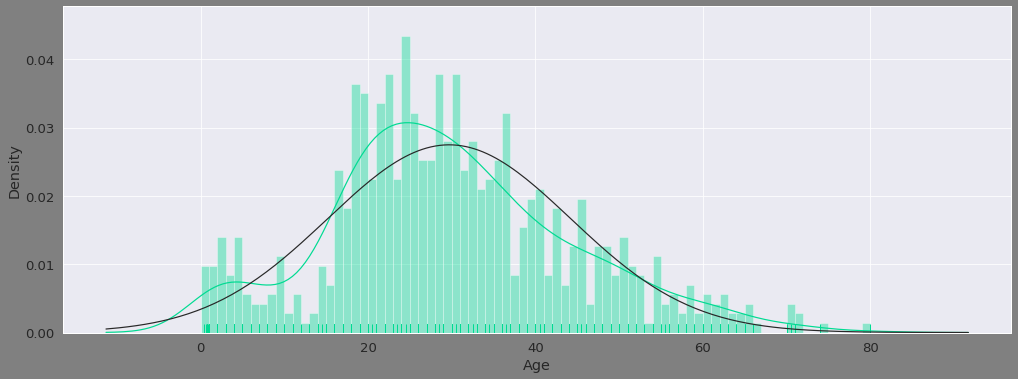

In [ ]:
plt.figure(figsize = [17,6])
a = sns.distplot(train_data['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

Most of the Passengers aboard the Titanic were in the range of 16~ to 40. The age distribution shows bi-modal curve.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

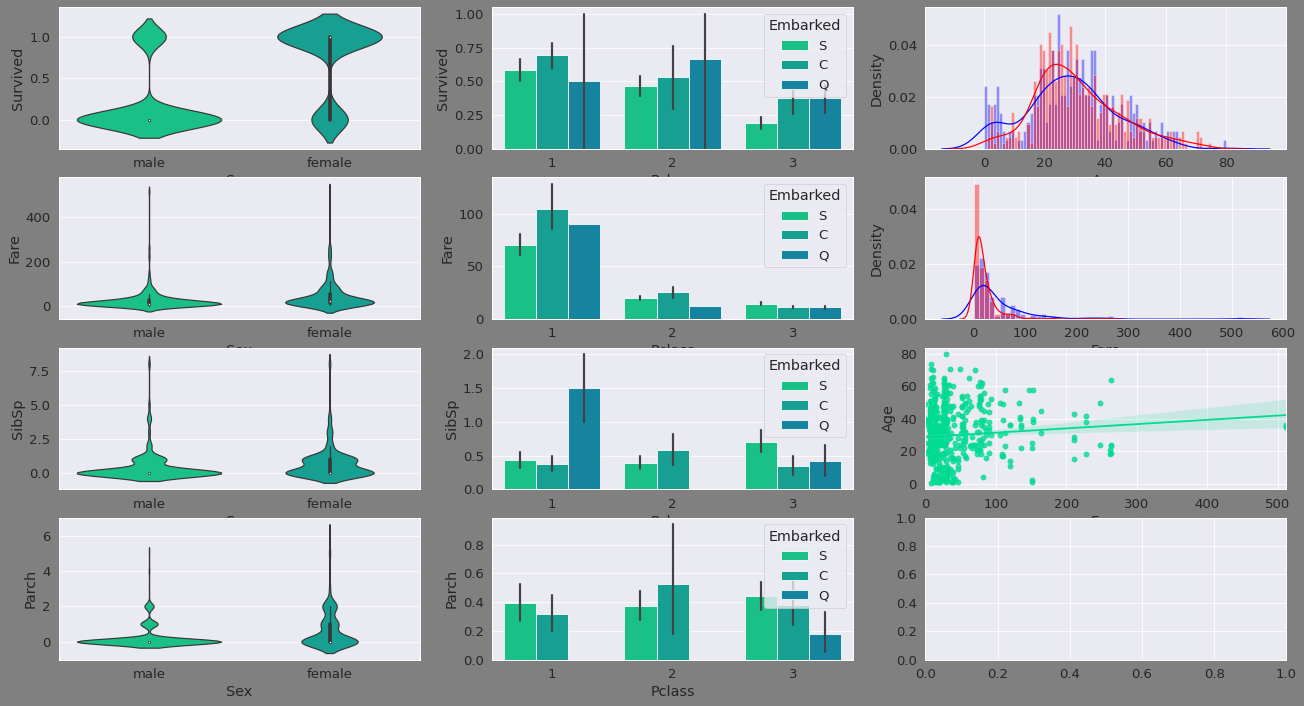

In [ ]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
#sns.set_palette('Set1', 8, .75)
#sns.set_style('whitegrid')
#plt.subplot(331)
sns.violinplot(x = 'Sex', y = 'Survived', data = train_data,ax = ax[0,0])
#sns.despine(offset=10, trim=True)
#plt.subplot(332)
sns.barplot(x = 'Pclass',y ='Survived',data = train_data,hue = 'Embarked',ax = ax[0,1])
#plt.subplot(333)
sns.distplot(train_data[train_data['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(train_data[train_data['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
#plt.subplot(334)
sns.violinplot(x = 'Sex', y = 'Fare', data = train_data,ax = ax[1,0])
#plt.subplot(335)
sns.barplot(x ='Pclass', y = 'Fare',data = train_data , hue = 'Embarked', ax = ax[1,1])
#plt.subplot(336)
sns.distplot(train_data[train_data['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(train_data[train_data['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])

#plt.subplot(337)
sns.violinplot(x = 'Sex', y ='SibSp',data = train_data,ax = ax[2,0])
#plt.subplot(338)
sns.barplot(x= 'Pclass', y = 'SibSp', data = train_data, hue = 'Embarked', ax = ax[2,1])
#plt.subplot(339)
sns.regplot(x = 'Fare', y = 'Age', data = train_data, ax = ax[2,2])
#plt.subplot(341)
sns.violinplot(x = 'Sex', y = 'Parch', data = train_data, ax = ax[3,0])
#plt.subplot(342)
sns.barplot(x = 'Pclass', y = 'Parch', data = train_data, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)



```
1. Starting from the first graph, we can see that very few males survived as compared to female and very few females died in comparision to males.

2. First and second class had the most survival rate than the third class whereas pessangers who boarded from 'S' had the least survival rate.

3. The blue and red distribution shows whether the pessanger survived or not.

4. & 5. There were many passengers from both category who paid nothing to board the ship particularly from the third class

6. The distribution of Fare with respect to Survival blue indicating Survived while red indicating dead.

7. & 8. There were more female SibSp(siblings and spouces) as compared to male and majority of them were from First class from Q station followed by third class.

9. Distribution of Fare by Age shows that there were many passengers paying nothing being majority while a few paying more than 500!

10. & 11. By looking at the graph we can see that it is similar with SibSp to some extent with the only difference that Parch is flattened and the bar plot says that Parch there were no Passengers from Q aboard as 1st and 2nd class.
```



In [ ]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 

In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carr, Miss. Helen ""Ellen""",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [ ]:
train_data[train_data['Fare']>500]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


those who paid highest have the same ticket names

In [ ]:
def get_isnull(train,test):
    return(train.isnull().sum(), test.isnull().sum()) 

In [ ]:
get_isnull(train_data,test_data)

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64, Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)

There are alot of missing values present in both the datasets which is not good for the model.



In [ ]:
#function for concatation for future use.
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf

In [ ]:
#Function for separation for future use.
def separate(data):
    data1 = data.iloc[:len(train_data)]
    data2 = data.iloc[len(train_data):]
    return data1, data2

In [ ]:
train_data[train_data['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


median is used instead of mean so that the value does not sway too much in a direction. 



In [ ]:
def filling(data1,data2):
    data = combine(data1,data2)
    #Sometimes csv file has null values, which are later displayed as NaN in Data Frame.
    # Just like pandas dropna() method manage and remove Null values from a data frame,
    # fillna() manages and let the user replace NaN values with some value of their own.
    data['Embarked'] = data['Embarked'].fillna('C')
    data['Age']      = data['Age'].fillna(data['Age'].median())
    data['Fare']     = data['Fare'].fillna(data['Fare'].median())
    data['Cabin']    = data['Cabin'].fillna('Z')
    data['Cabin']    = data['Cabin'].apply(lambda x: str(x)[0])
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = filling(train_data, test_data)

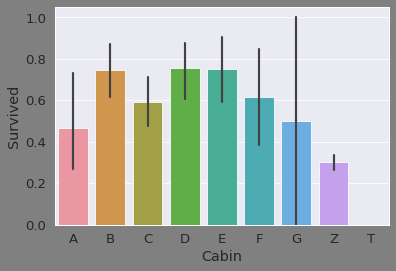

In [ ]:
sns.barplot(x= 'Cabin', y = 'Survived', data = train_data ,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'T'])


In [ ]:
def pew(data1, data2):
    data = combine(data1,data2)
    #Replace a single value with a new value for an individual DataFrame column
    data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
    data['Cabin'] = data['Cabin'].replace(['F', 'C'], 'M')        #Medium
    data['Cabin'] = data['Cabin'].replace(['T', 'G', 'A',], 'L')  #Low
    data['Cabin'] = data['Cabin'].replace(['Z'],'X')              #Missing
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = pew(train_data, test_data)

Combine both SibSp and Parch as they can be represented as family.



In [ ]:
def family(data1, data2):
    data = combine(data1,data2)
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data['Alone']  = data['Family'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(['SibSp','Parch'],axis = 1, inplace = True)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = family(train_data, test_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


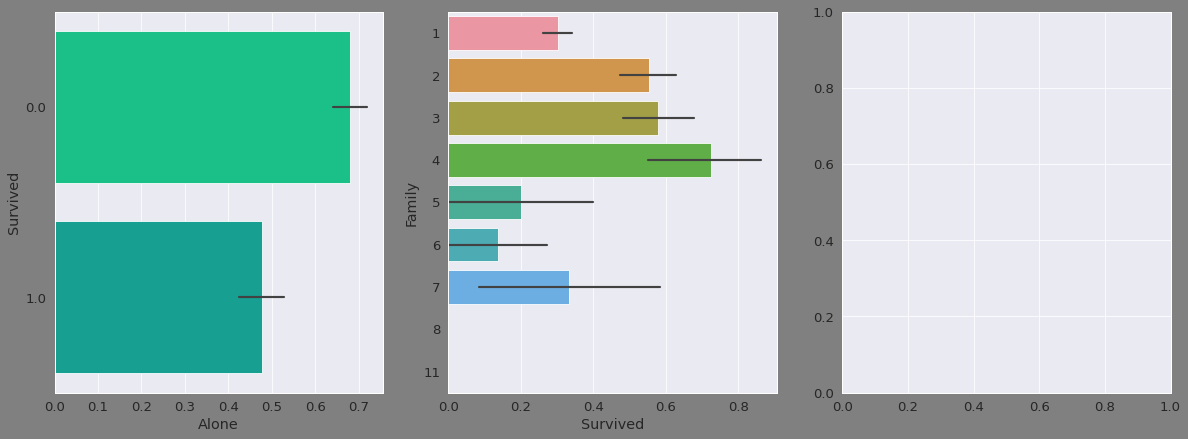

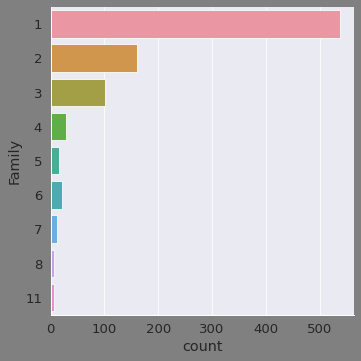

In [ ]:
f,ax = plt.subplots(1,3,figsize=[20,7])
sns.barplot(x = 'Alone', y = 'Survived', data = train_data,orient = 'h', ax = ax[0])
sns.barplot(x = 'Survived', y = 'Family', data = train_data,orient = 'h', ax = ax[1])
sns.catplot(y = 'Family',data = train_data, kind = 'count', orient = 'h', ax = ax[2])
#plt.close(2)
#plt.close(3)

Most of the Passengers aboard were alone. The Passengers who were alone had a lower survival rate which is also true for Passengers who had more than 4 members with them.

In [ ]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,X,S,2,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,M,C,2,0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,X,S,1,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,M,S,2,0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,X,S,1,1


In [ ]:
def FamilyGroup(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Family'] > 2, 'FamilyGroup'] = 3
    data.loc[data['Family'] == 1, 'FamilyGroup'] = 1
    data.loc[data['Family'] == 2, 'FamilyGroup'] = 2
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = FamilyGroup(train_data, test_data)

In [ ]:
def mapping(data1, data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].map({'C':1, 'S':2, 'Q':3})
    data['Sex']      = data['Sex'].map({'male': 1,'female':0})
    data['CabinGroup'] = data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = mapping(train_data, test_data)

In [ ]:
train_data['CabinGroup'].value_counts()

3    687
0    112
1     72
2     20
Name: CabinGroup, dtype: int64

In [ ]:
def Titles(data1, data2):
    data = combine(data1,data2)
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          #High
                                            regex = True).replace(['Mrs','Miss','Master',],1,               #Medium
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              #Low
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, #Least
                                            regex = True)
    #data['TitleGroup'] = data['TitleGroup'].replace({'male':1,'female':0,'Special':2})
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = Titles(train_data, test_data)
##['Mrs','Miss','Mme','Ms','Lady','Mlle','Countess','Dona'],'female'
##['Sir','Don','Rev','Mr',],'male'
##['Col','Dr','Col','Capt','Major','Jonkheer','Master'],'Special'

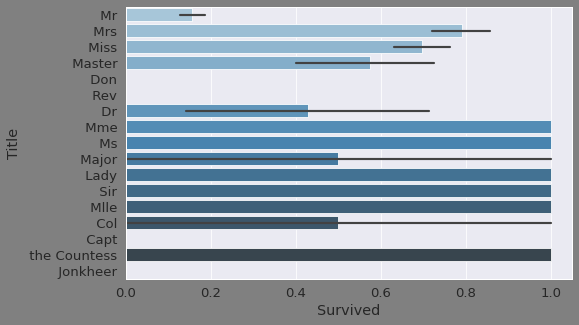

In [ ]:
plt.figure(figsize = [8,5])
sns.barplot(x = 'Survived', y = 'Title', data = train_data, palette = 'Blues_d',)

In [ ]:
def surname(data1, data2):
    data = combine(data1,data2)
    data['Surname'] = data['Name'].apply(lambda x: str(x).split(' ')[0].split(',')[0])
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    train_data, test_data = separate(data)
    return train_data, test_data

train_data, test_data = surname(train_data, test_data)


In [ ]:
train_data.loc[train_data['Ticket'].str.contains('113803')]


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname
PassengerId,,,,,,,,,,,,,,,,,
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1,M,2,2,0,2.0,1,Mrs,1,Futrelle,2
138,0.0,1,"Futrelle, Mr. Jacques Heath",1,37.0,113803,53.1,M,2,2,0,2.0,1,Mr,2,Futrelle,2


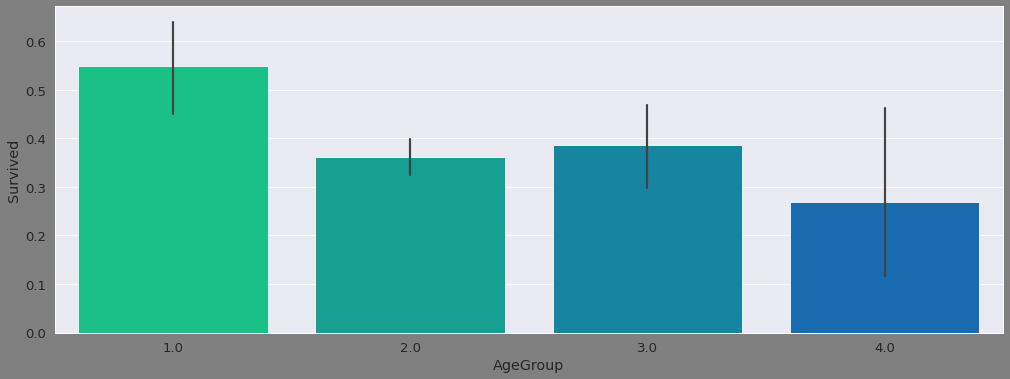

In [ ]:
def age_distribution(data1, data2):
    data = combine(data1,data2)
    #data.loc[data['Age']].round() not sure what is wrong with the round function
    data.loc[data['Age'] <= 16, 'AgeGroup'] = 1
    data.loc[(data['Age'] > 16) & (data['Age'] <= 40), 'AgeGroup'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] < 60), 'AgeGroup'] = 3
    data.loc[(data['Age'] >= 60), 'AgeGroup'] = 4
    #data['AgeGroup'].astype(int)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = age_distribution(train_data, test_data)
plt.figure(figsize = [17,6])
sns.barplot(x = train_data['AgeGroup'], y = train_data['Survived'])
plt.rc('xtick',labelsize = 12)

In [ ]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,X,2,2,0,2.0,3,Mr,2,Braund,2,2.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,M,1,2,0,2.0,1,Mrs,1,Cumings,2,2.0
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,X,2,1,1,1.0,3,Miss,1,Heikkinen,1,2.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2.0,1,Mrs,1,Futrelle,2,2.0
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1.0,3,Mr,2,Allen,2,2.0


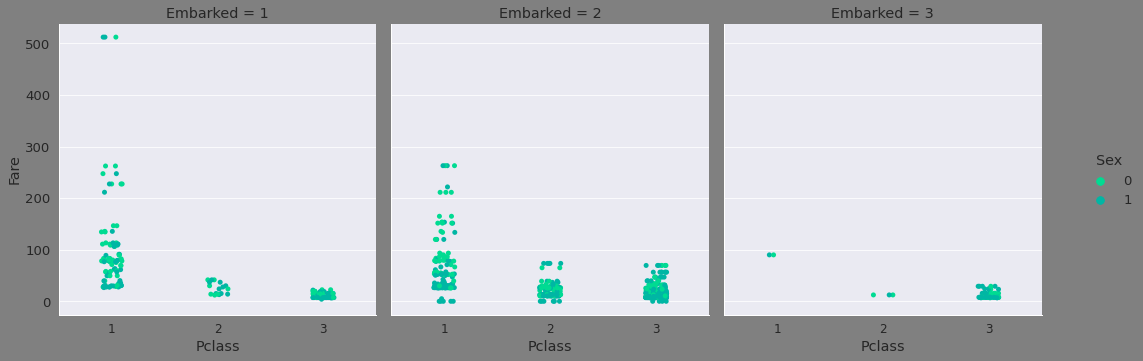

In [ ]:
sns.catplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = train_data, margin_titles = True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


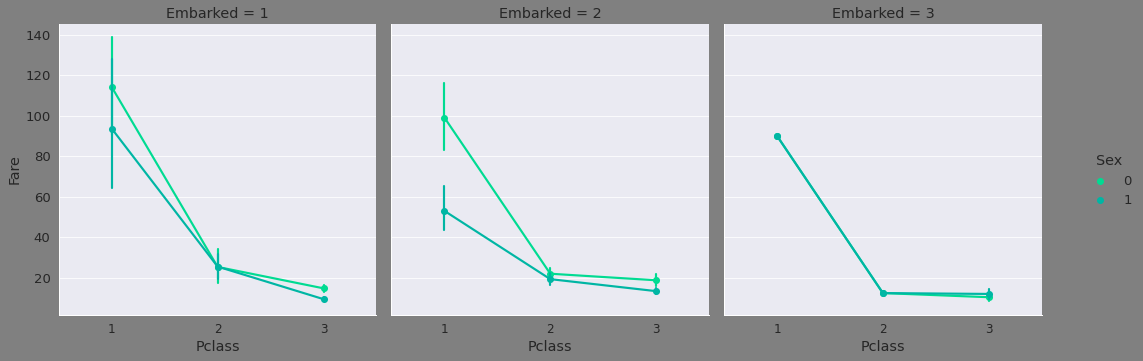

In [ ]:
sns.factorplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = train_data, margin_titles = True)

There is much difference for 1st and 2nd Embarkation for 1st and 3rd Pclass in terms of fare for males and females while the 2nd class fare is similar in all the Embarkations.



In [ ]:
def SharedSurname(data1, data2):
    data = combine(data1,data2)
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = SharedSurname(train_data, test_data)

In [ ]:
test_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",1,34.5,330911,7.8292,X,3,1,1,1.0,3,Mr,2,Kelly,5,2.0
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,X,2,2,0,2.0,3,Mrs,1,Wilkes,1,3.0
894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,X,3,1,1,1.0,3,Mr,2,Myles,1,4.0
895,NaN,3,"Wirz, Mr. Albert",1,27.0,315154,8.6625,X,2,1,1,1.0,3,Mr,2,Wirz,1,2.0
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,3101298,12.2875,X,2,3,0,3.0,3,Mrs,1,Hirvonen,2,2.0


Grouping Fare and creating a new column called 'FareGroup' with their means by Pclass



In [ ]:
def fare_distribution(data1, data2):
    data = combine(data1,data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    #data['Fare'] = data['Fare'].map({'Very Low': 0, 'Low': 1, 'Medium':2, 'High':3})
    data['FareGroup'] = data['FareGroup'].astype(int)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = fare_distribution(train_data, test_data)

In [ ]:
def Tickets(data1, data2):
    data = combine(data1,data2)
    #Creating a new column to display the freq of the tickets present
    data['SharedTicketCount'] = data.groupby('Ticket')[['Fare']].transform('count').astype(int)
    #Removing any characters other than alphabets and numbers to count the ticket length
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = Tickets(train_data, test_data)

In [ ]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Family', 'Alone', 'FamilyGroup', 'CabinGroup', 'Title',
       'TitleGroup', 'Surname', 'SharedSurname', 'AgeGroup', 'FareGroup',
       'SharedTicketCount', 'TicketLength'],
      dtype='object')

In [ ]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A521171,7.2500,X,2,2,0,2.0,3,Mr,2,Braund,2,2.0,1,1,7
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC17599,71.2833,M,1,2,0,2.0,1,Mrs,1,Cumings,2,2.0,3,2,7
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STONO23101282,7.9250,X,2,1,1,1.0,3,Miss,1,Heikkinen,1,2.0,1,1,13
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2.0,1,Mrs,1,Futrelle,2,2.0,3,2,6
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1.0,3,Mr,2,Allen,2,2.0,1,1,6


In [ ]:
X = train_data.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
y = train_data['Survived']
X.shape , y.shape

((891, 11), (891,))

In [ ]:
X.head()

,Pclass,Sex,Embarked,FamilyGroup,CabinGroup,TitleGroup,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,
1,3,1,2,2.0,3,2,2,2.0,1,1,7
2,1,0,1,2.0,1,1,2,2.0,3,2,7
3,3,0,2,1.0,3,1,1,2.0,1,1,13
4,1,0,2,2.0,1,1,2,2.0,3,2,6
5,3,1,2,1.0,3,2,2,2.0,1,1,6


In [ ]:
X.columns

Index(['Pclass', 'Sex', 'Embarked', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

### (b) Select at least one appropriate model (e.g., neural network, support vector machine, etc.) to build
your classifier. Clearly describe the model you use, including the input and output dimensions,
structure of the model, loss function(s), training strategy, etc. Include your code as well if you are
solving the problem by programming. (15% marks)



**SVM**

Support Vector Machines (SVMs) are widely applied in the field of pattern classifications and nonlinear regressions. 

**How SVMs Work**

Support-vector machines work by finding data points of different classes and drawing boundaries between them. The selected data points are called the support-vectors and the boundaries are called hyperplanes.
The algorithm considers each pair of data points until it finds the closest pair that are in different classes and draws a straight line (or plane) midway between them.
If the input data is linearly separable, then solving for the hyperplane is simple. But it’s often the case that classification regions overlap and that no single straight plane can act as a boundary.
One way to get around this is to project your data into higher dimensions by creating additional features. Instead of the two-dimensional space you get from having features a and b, you could combine them (for example ab, a², b²) and try to find patterns (or a dividing hyperplane) in those dimensions.
But there’s a problem with this approach. While having the extra dimensions makes it easier to find a hyperplane, it also gives your algorithm more features to learn.
SVMs allow us to sidestep this additional learning by using the Kernel Trick.

**Kernal Trick**

It’s one of those things that is included in every discussion of SVMs, but it’s often not explained as well as it could be.
A kernel is just a function which takes two data points as inputs and returns a similarity score. This similarity can be interpreted as a metric of closeness. The nearer the data points are, the higher the similarity.
The cool thing about kernel functions is that they can give us similarity scores from higher dimensions without us having to transform our data.
We get to find the closest data points in much higher dimensions without them actually being there. That means we can get all the upside from the additional features without engineering and learning them.
The kernel trick, then, is using a kernel function instead of doing a high-cost transformation.

**Python**


The most widely used library for implementing machine learning algorithms in Python is scikit-learn. The class used for SVM classification in scikit-learn is svm.SVC()

Parameters are as follows:
*   C: It is the regularization parameter, C, of the error term.
*   kernel: It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or a callable. The default value is ‘rbf’.
* degree: It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. The default value is 3.
* gamma: It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If gamma is ‘auto’, then 1/n_features will be used instead.
* probability : bool, default=False

  Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the User Guide.
* random_state : int or RandomState instance, default=None

  Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls. See Glossary.
* decision_function_shape : {‘ovo’, ‘ovr’}, default=’ovr’

  Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification.



#### Correlation

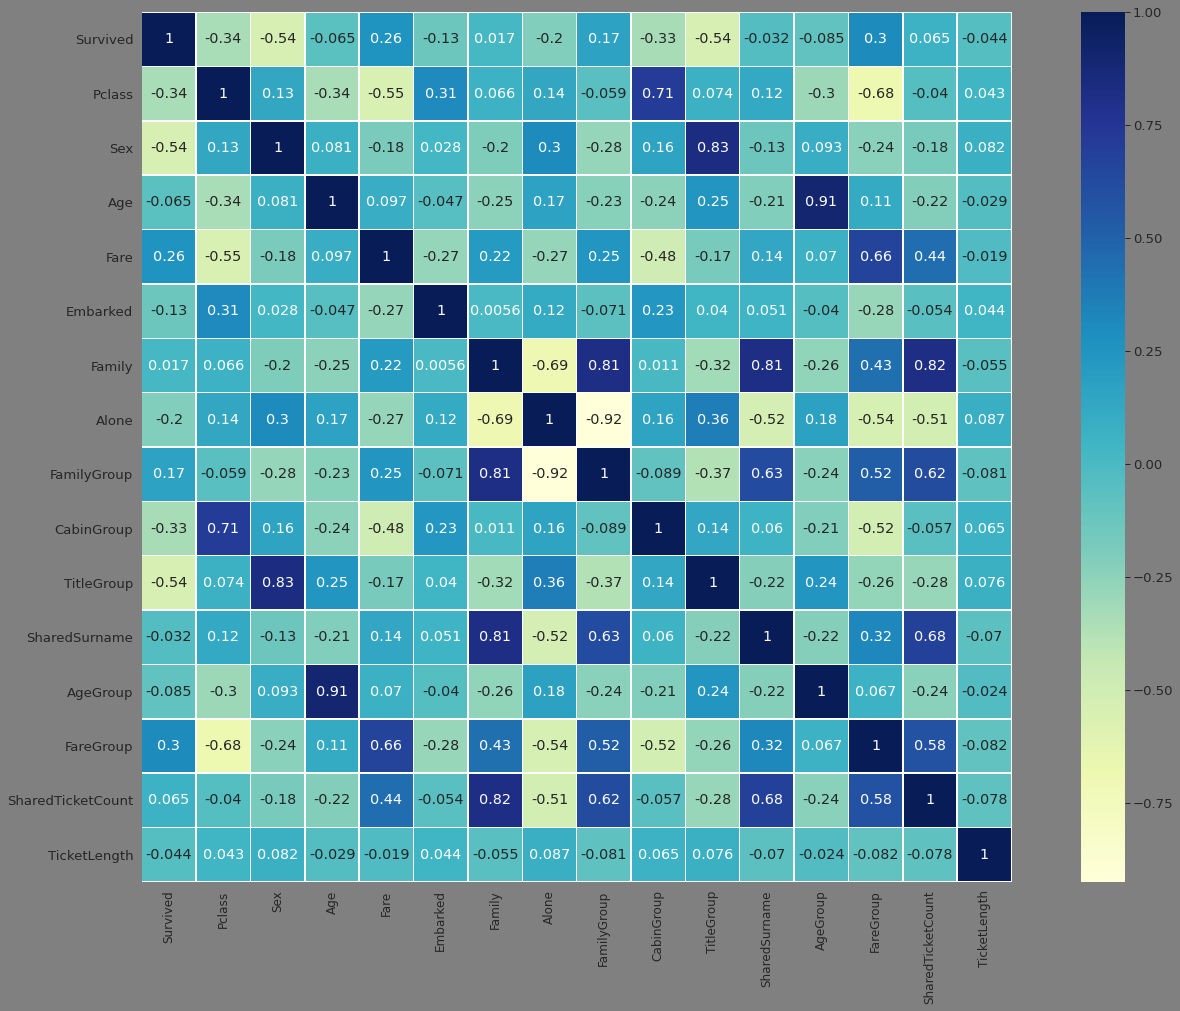

In [ ]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(train_data.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

Since categorical features have been created from the features present in the dataset, we will only be taking the categorical for training the models.

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier, plot_importance 

In [ ]:
npX = np.array(X).copy()
npy = np.array(y).copy()

#### Model(SVM)

In [ ]:
clf_svm = SVC()

In [ ]:
Classifiers = ['SVM']
scores = []
models = [clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [ ]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score', ascending = False)

In [ ]:
mode

,score
SVM,0.833895


In [ ]:
parameters_svm = {'C':[0.01,0.9],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

**parameters for SVM**

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

probabilitybool, default=False
Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the User Guide.
random_stateint or RandomState instance, default=None
Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls. See Glossary.
decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification.


In [ ]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

In [ ]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

In [ ]:
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)

0.8338951310861423


### (c) Discuss how you consider and determine the parameters (e.g., learning rate, etc.) / settings of your model as well as your reasons of doing so. (15% marks)




One can tune the SVM by changing the parameters 𝐶,𝛾 and the kernel function. The function for tuning the parameters available in scikit-learn is called gridSearchCV().

sklearn.model_selection.GridSearchCV(estimator, param_grid)

Parameters of this function are defined as:

* estimator: It is the estimator object which is svm.SVC() in our case.
* param_grid: It is the dictionary or list with parameters names (string) as keys and lists of parameter settings to try as values.

param_grid used was:

```
parameters_svm = {'C':[0.01,0.9],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}
```

specifies the grid that should be explored:

 C values in [0.01,0.9] from smaller values to larger values, and the kernel with an RBF kernel and a linear kernal `'kernel':['rbf','linear']`, and gamma values in [0, 0.1, 'auto' ], and both probability true and false, and random state [0 ,7 ,16 ] from smaller values to larger values, and decision function state both 'ovo'(one-vs-one) and 'ovr'(one-vs-rest), and degree values in [3 ,4 ,10 ]



**GridSearchCV**

Exhaustive search over specified parameter values for an estimator.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.




```
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()
```



```
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)
```




In the above code, the parameters we have considered for tuning are kernel, C, gamma, probability, degree, random_state and decision_function_state. The values from which the best value is to be are the ones written in the bracket. Here, we have only given a few values to be considered but a whole range of values can be given for tuning but it will take a longer time for execution.

### (d) Discuss how you handle attributes with missing values and what attributes are excluded from your classifier(s), and why. (10% marks)




```
def get_isnull(train,test):
    return(train.isnull().sum(), test.isnull().sum()) 

get_isnull(train_data,test_data)


(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64, Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)
 
```

[Link to cell](https://colab.research.google.com/drive/1ddAgeat4FEgNqN6AjytL_KD33J064iYS?authuser=2#scrollTo=3PIfrlIoNV4b&line=1&uniqifier=1)



There are alot of missing values present in both the datasets which is not good for the model.

I used median instead of mean so that the value does not sway too much in a direction.



```
def filling(data1,data2):
    data = combine(data1,data2)
    #Sometimes csv file has null values, which are later displayed as NaN in Data Frame.
    # Just like pandas dropna() method manage and remove Null values from a data frame,
    # fillna() manages and let the user replace NaN values with some value of their own.
    data['Embarked'] = data['Embarked'].fillna('C')
    data['Age']      = data['Age'].fillna(data['Age'].median())
    data['Fare']     = data['Fare'].fillna(data['Fare'].median())
    data['Cabin']    = data['Cabin'].fillna('Z')
    data['Cabin']    = data['Cabin'].apply(lambda x: str(x)[0])
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = filling(train_data, test_data)
```

For empty values, I used fillna to fill them up with the median of their values or new categories sucha as 'C' for Embarked and 'Z' for Cabin.


```
def pew(data1, data2):
    data = combine(data1,data2)
    data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
    data['Cabin'] = data['Cabin'].replace(['F', 'C'], 'M')        #Medium
    data['Cabin'] = data['Cabin'].replace(['T', 'G', 'A',], 'L')  #Low
    data['Cabin'] = data['Cabin'].replace(['Z'],'X')              #Missing
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data  = pew(train_data, test_data)
```
Categorised the different cabins into High 'H', Medium 'M', Low 'L' and Missing 'X'.



we combine both SibSp and Parch as they can be represented as family.

```
def family(data1, data2):
    data = combine(data1,data2)
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data['Alone']  = data['Family'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(['SibSp','Parch'],axis = 1, inplace = True)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = family(train_data, test_data)


def FamilyGroup(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Family'] > 2, 'FamilyGroup'] = 3
    data.loc[data['Family'] == 1, 'FamilyGroup'] = 1
    data.loc[data['Family'] == 2, 'FamilyGroup'] = 2
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = FamilyGroup(train_data, test_data)

```
Create a new column called family group which take the number of family members and categories them.




```
def mapping(data1, data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].map({'C':1, 'S':2, 'Q':3})
    data['Sex']      = data['Sex'].map({'male': 1,'female':0})
    data['CabinGroup'] = data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = mapping(train_data, test_data)
```
Created a new mapping for Embark, Sex and CabinGroup.
This is to make a new column for cabingroup and change the variables of Embark and Sex to integers.



```
def Titles(data1, data2):
    data = combine(data1,data2)
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          #High
                                            regex = True).replace(['Mrs','Miss','Master',],1,               #Medium
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              #Low
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, #Least
                                            regex = True)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data  = Titles(train_data, test_data)
```

Categorised the different titles into [ 0, 1, 2, 4] with 0 being the highest and 4 being the least.



```
def surname(data1, data2):
    data = combine(data1,data2)
    data['Surname'] = data['Name'].apply(lambda x: str(x).split(' ')[0].split(',')[0])
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    train_data, test_data = separate(data)
    return train_data, test_data

train_data, test_data = surname(train_data, test_data)
```

Create a new column called Surname and SharedSurname for people of the same surname and put the count under SharedSurname


There is much difference for 1st and 2nd Embarkation for 1st and 3rd Pclass in terms of fare for males and females while the 2nd class fare is similar in all the Embarkations.

Grouping Fare and creating a new column called 'FareGroup' with their means by Pclass



```
def fare_distribution(data1, data2):
    data = combine(data1,data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    #data['Fare'] = data['Fare'].map({'Very Low': 0, 'Low': 1, 'Medium':2, 'High':3})
    data['FareGroup'] = data['FareGroup'].astype(int)
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = fare_distribution(train_data, test_data)
```




Creating a new column to display the freq of the tickets present
```
def Tickets(data1, data2):
    data = combine(data1,data2)
    #Creating a new column to display the freq of the tickets present
    data['SharedTicketCount'] = data.groupby('Ticket')[['Fare']].transform('count').astype(int)
    #Removing any characters other than alphabets and numbers to count the ticket length
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    train_data, test_data = separate(data)
    return train_data, test_data
train_data, test_data = Tickets(train_data, test_data)
```



In [ ]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Family', 'Alone', 'FamilyGroup', 'CabinGroup', 'Title',
       'TitleGroup', 'Surname', 'SharedSurname', 'AgeGroup', 'FareGroup',
       'SharedTicketCount', 'TicketLength'],
      dtype='object')



```
X = train_data.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
y = train_data['Survived']
X.shape , y.shape
```
Removed 'Name','Title','Surname','Survived','Cabin','Ticket','Age','Fare','Family','Alone' because we have created new columns that gives us more information. 

The new columns have been 'cleaned' and thus have a better data quality than the original columns.



```
Quality data beats fancy algorithms.
```



### (f) How many of these 418 passengers are classified as survivors from the Titanic tragedy? Among these classified survivors, how many of them were (i) female, (ii) below 18 years old, (iii) without any other family members on board? Passengers from which (iv) ticket class and (v) port of embarkment had the least chance of surviving the tragedy? (10% marks)

In [ ]:
file = files.upload()
def Readcsv(data):
    return (pd.read_csv(data,index_col = 'PassengerId'))
test_data = Readcsv("test.csv")

Saving test.csv to test (1).csv


In [ ]:
combine_data = pd.concat([test_data, predictions], axis=1, join='inner')
combine_data.to_csv('combine_data.csv')

In [ ]:
combine_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


#### Among these classified survivors, how many of them were (i) female

In [ ]:
women = combine_data.loc[combine_data.Sex == 'female']["Survived"]
sum(women)

print("Number of Female who survived:", sum(women))

Number of Female who survived: 141.0


#### Among these classified survivors, how many of them were (ii) below 18

In [ ]:
below_18 = combine_data.loc[combine_data.Age < 18]["Survived"]
sum(below_18)

print("Number of people below 18 who survived:", sum(below_18))


Number of people below 18 who survived: 27.0


#### (iii) without any other family members on board

In [ ]:
no_fam = combine_data.loc[combine_data.SibSp == 0][combine_data.Parch == 0]["Survived"]
sum(no_fam)

print("Number of people with no family who survived:", sum(no_fam))

Number of people with no family who survived: 71.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### Passengers from which (iv) ticket class had the least chance of surviving the tragedy? (10% marks)

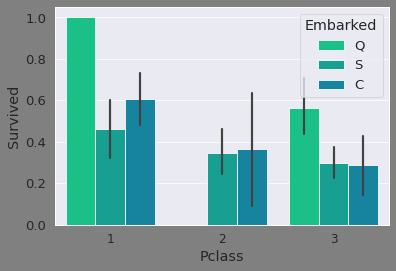

In [ ]:
sns.barplot(x = 'Pclass',y ='Survived',data = combine_data,hue = 'Embarked')

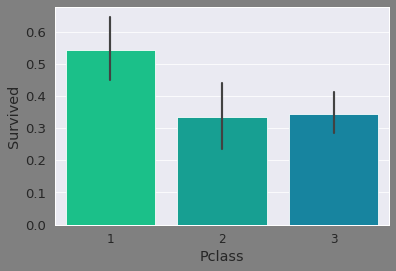

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=combine_data)


Class 2 had the least chance of survival

#### Passengers from which (v) port of embarkment had the least chance of surviving the tragedy? (10% marks)

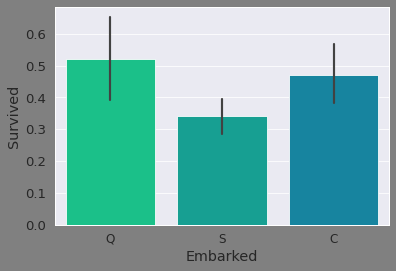

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=combine_data)


Embarking from Southampton had the least chance of survival

### (g) Build one more classifier (either a new model, or your existing one with different loss functions). Discuss and compare the results obtained from different classifiers. (10% marks)

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier

In [ ]:
clf_svm = SVC()
clf_lsvc = LinearSVC(penalty='l2', loss='squared_hinge')
clf_rf = RandomForestClassifier()

**Evaluate a score by cross-validation**

Compare the scores of SVM, Linear SVM and Random Forest using cross validation.

In a K-FOLD Cross Validation, the following procedure is followed as follows:


1.   Model is trained using K-1 of the folds as training data
2.   Resulting Model is validated on the remaining data

This process is repeated K times and performance measure such as "ACCURACY" is computed at each step.



In [ ]:
Classifiers = ['SVM','Linear SVC','RandomForest']
scores = []
models = [clf_svm,clf_lsvc,clf_rf ]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [ ]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score', ascending = False)
mode

,score
SVM,0.833895
RandomForest,0.833883
Linear SVC,0.827179


Here the single mean Score is calculated. By default, the score computed at each CV iteration is the score method of the estimator.

From this chart, SVM is best performing, followed by Random Forest and then Linear SVM.

Parameters for Random Forest

In [ ]:
parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

Score for Random Forest


We will now compare Random Forest with SVM.

However, this time we will be using the best parameters with hyper parameter tuning. This is so that we can have the most accurate score.

Random forest score 0.8439825218476903


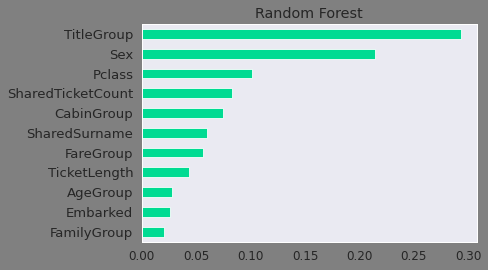

In [ ]:
best_score_rf, best_params_rf = grid(clf_rf, parameters_rf)
print("Random forest score",best_score_rf)
imp_features(RandomForestClassifier,'Random Forest', best_params_rf)

**Score for SVM**

In [ ]:
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)

0.8338951310861423


**The final score**

After using hyper parameter tuning, Random Forest performs better or have a better "accuracy" than SVM.


**Data Visualisation**

Let us visualize the decision boundaries to see if our models are overfitting or not and to compare which is the better model.

In [ ]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

**Plot for Random Forest**


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


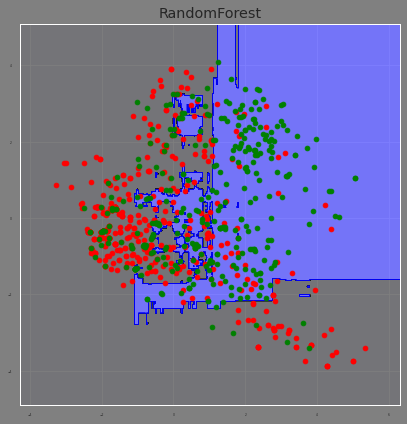

In [ ]:
fig = plt.figure(figsize=[15,7])
ax = plt.subplot(1,2,2)
plt.title('RandomForest')
boundaries(RandomForestClassifier, 'Random Forest', best_params_rf)

The graphs above clearly shows that the Random Forest model is overfitting quite a bit, hence their performance will be bad on the test set.

Let's look at the SVM model's decision boundaries with mlxtend library.

**Plot for SVM**

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Support Vector Machines')

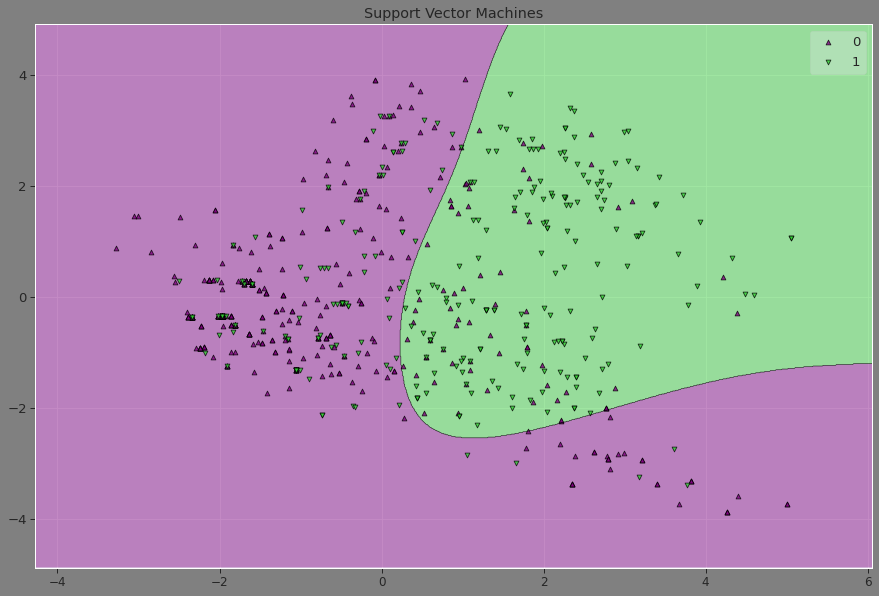

In [ ]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = t.astype(np.integer)
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',markers = ['^','v'])
plt.title('Support Vector Machines')

From the graph, it seems that SVM is performing better

### (h) Extend your classification algorithm, or build another network (e.g., CNN) for image classification for Cifar-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). Describe details about the dataset, classification problem that you are solving, and how your algorithm can tackle this problem. Report your results for the testing set of Cifar-10. (15% marks)

#### Details about the Dataset Cifar-10

**Import TensorFlow**


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download and prepare the CIFAR10 dataset**

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. 
The dataset is divided into 50,000 training images and 10,000 testing images. 
The classes are mutually exclusive and there is no overlap between them.


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

**Verify the data**

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

The class labels and their standard associated integer values are listed below.

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

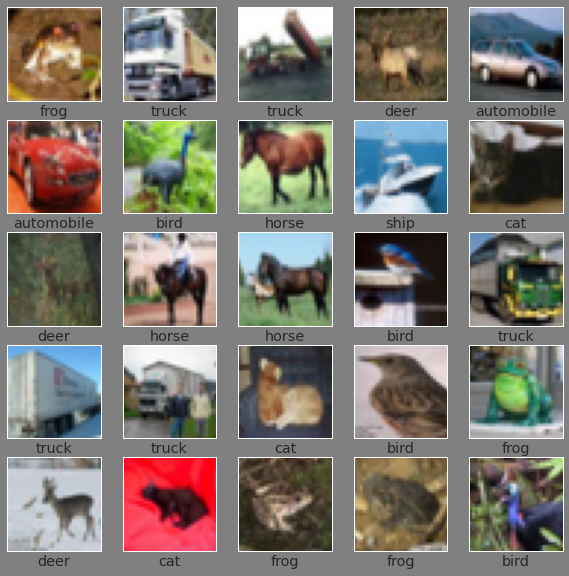

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### Classification problem

This is an image classification problem. Hence, the goal would be to accurately classify the 10 different classes.

CNN is used in this project due to its robustness when it comes to image classification task.

#### How your algorithm can tackle this problem

Here are some reasons why I chose CNN:



1.   **Parameters**

  The number of parameters in a neural network grows rapidly with the increase in the number of layers. This can make training for a model computationally heavy (and sometimes not feasible). Tuning so many of parameters can be a very huge task. The time taken for tuning these parameters is diminished by CNNs.


2.   **Network**

  CNNs are fully connected feed forward neural networks. CNNs are very effective in reducing the number of parameters without losing on the quality of models. Images have high dimensionality (as each pixel is considered as a feature) which suits the above described abilities of CNNs. Also, CNNs were developed keeping images into consideration but have achieved benchmarks in text processing too. CNNs are trained to identify the edges of objects in any image.

3. **Dimensionality reduction**

  Dimensionality reduction is achieved using a sliding window with a size less than that of the input matrix. Intuitively thinking, we consider a small patch of the complete image at once. This square patch is the window which keeps shifting left to right and top to bottom to cover the complete image.
Small regression models are trained to detect specific objects in an image (say one model detects dogs, other detects grass and so on).

4. **Fit**

  All the layers of a CNN have multiple convolutional filters working and scanning the complete feature matrix and carry out the dimensionality reduction. This enables CNN to be a very apt and fit network for image classifications and processing.


In conclusion, CNN's are really effective for image classification as the concept of dimensionality reduction suits the huge number of parameters in an image.



**Create the convolutional base**

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this model, the CNN is configured to process inputs of shape (32, 32, 3), which is the format of CIFAR images. We do this by passing the argument input_shape to our first layer.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Display the architecture of our model so far.



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, we can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer.

**Add Dense layers on top**

To complete our model, we will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so we use a final Dense layer with 10 outputs and a softmax activation.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of our model.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As we can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

**Compile and train the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5423 - accuracy: 0.4345 - val_loss: 1.2794 - val_accuracy: 0.5378
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1775 - accuracy: 0.5824 - val_loss: 1.0978 - val_accuracy: 0.6119
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0336 - accuracy: 0.6371 - val_loss: 1.0490 - val_accuracy: 0.6242
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9312 - accuracy: 0.6719 - val_loss: 0.9821 - val_accuracy: 0.6567
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8564 - accuracy: 0.6985 - val_loss: 0.9762 - val_accuracy: 0.6565
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8032 - accuracy: 0.7181 - val_loss: 0.9280 - val_accuracy: 0.6826
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7535 - accuracy: 0.7341 - val_loss: 0.8803 -

**Evaluate the model**

313/313 - 4s - loss: 0.8587 - accuracy: 0.7097


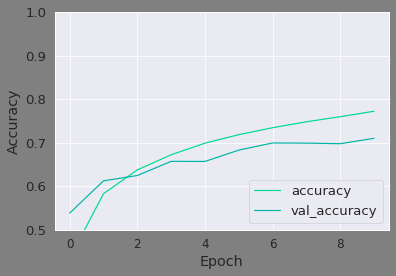

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7096999883651733


The CNN has achieved a test accuracy of over 70%.

###**Reference**:

1.   Dawson, C. (2019, September 26). A Guide to SVM Parameter Tuning. Retrieved November 10, 2020, from https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

2.   Simple Tutorial on SVM and Parameter Tuning in Python and R. (2019, May 20). Retrieved November 10, 2020, from https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/

3. Convolutional Neural Network (CNN) &nbsp;: &nbsp; TensorFlow Core. (n.d.). Retrieved November 11, 2020, from https://www.tensorflow.org/tutorials/images/cnn